<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_10895_matrix_transpose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UVA 10895 - Matrix Transpose

**@PDF: [UVA 10895 - Matrix Transpose](https://onlinejudge.org/external/108/10895.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

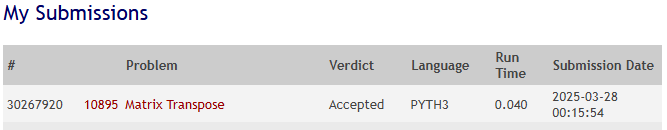

## Problem Description

A matrix is a rectangular array of elements, most commonly numbers. [cite: 1, 2] A matrix with m rows and n columns is said to be an $m-by-n$ matrix. [cite: 2] For example,

$A=(\begin{matrix}1&3&2\\ 0&4&-1\\ 0&0&0\\ 5&-2&11\end{matrix})$

is a 4-by-3 matrix of integers. [cite: 3]

The individual elements of a matrix are usually given lowercase symbols and are distinguished by subscripts. [cite: 4] The ith row and jth column of matrix A is usually referred to as $a_{ij}$. [cite: 4] For example, $a_{23}=-1$. [cite: 4] Matrix subscripts are 1-based. [cite: 5]

The transpose of a matrix M, denoted $M^{T}$, is formed by interchanging the rows and columns of M. [cite: 5] That is, the ij-th element of $M^{T}$ is the ji-th element of M. [cite: 5] For example, the transpose of matrix A above is:

$A^{T}=(\begin{matrix}1&0&0&5\\ 3&4&0&-2\\ 2&-1&0&11\end{matrix})$

A matrix is said to be sparse if there are relatively few non-zero elements. [cite: 6] As a m-by-n matrix has mn number of elements, storing all elements of a large sparse matrix may be inefficient as there would be many zeroes. [cite: 6, 7] There are a number of ways to represent sparse matrices, but essentially they are all the same: store only the non-zero elements of the matrix along with their row and column. [cite: 7, 8]

You are to write a program to output the transpose of a sparse matrix of integers. [cite: 8]

## Input

You are given several sparse matrix in a row, each of them described as follows. [cite: 9, 10] The first line of the input corresponds to the dimension of the matrix, m and n (which are the number of rows and columns, respectively, of the matrix). [cite: 10] You are then given m sets of numbers, which represent the rows of the matrix. [cite: 11] Each set consists of two lines which represents a row of the matrix. [cite: 12, 13, 14] The first line of a set starts with the number r, which is the number of non-zero elements in that row, followed by r numbers which correspond to the column indices of the non-zero elements in that row, in ascending order; [cite: 13, 14] the second line has r integers which are the matrix elements of that row. [cite: 14, 15] For example, matrix A above would have the following representation:

4 3\
3 1 2 3\
1 3 2\
2 2 3\
4 -1\
0\
3 1 2 3\
5 -2 11


Note that for a row with all zero elements, the corresponding set would just be one number, '0', in the first line, followed by a blank line. [cite: 15]

You may assume:

* the dimension of the sparse matrix would not exceed 10000-by-10000,
* the number of non-zero element would be no more than 1000,
* each element of the matrix would be in the range of -10000 to 10000, and
* each line has no more than 79 characters. [cite: 16, 17]

## Output

For each input case, the transpose of the given matrix in the same representation. [cite: 18]

## Sample Input

4 3\
3 1 2 3\
1 3 2\
2 2 3\
4 -1\
0\
3 1 2 3\
5 -2 11


## Sample Output

3 4\
2 1 4\
1 5\
3 1 2 4\
3 4 -2\
3 1 2 4\
2 -1 11

In [ ]:
def transpose(mat, rows, cols):
  """
  Transposes a sparse matrix represented as an adjacency list.

  Args:
    mat: A list of lists, where each inner list represents a row of the matrix
         and contains tuples of (column_index, value).  The inner lists are
         assumed to be sorted by column index.
    rows: The number of rows in the input matrix.
    cols: The number of columns in the input matrix.

  Returns:
    A list of lists representing the transposed matrix in the same format as the input.
  """

  t_rows = cols  # Transposed matrix will have cols as rows
  ptr = [0] * rows  # Pointers to track the current element being processed in each row of the input matrix
  t_mat = [[] for _ in range(t_rows)]  # Initialize the transposed matrix

  # Iterate through the rows of the transposed matrix
  for i in range(t_rows):
    # Iterate through the rows of the original matrix
    for j in range(rows):
      # Check if the current element in the original matrix corresponds to the current column in the transposed matrix
      if ptr[j] < len(mat[j]) and mat[j][ptr[j]][0] == i + 1:  # mat[j][ptr[j]][0] is the column index
        # Add the corresponding element to the transposed matrix. The row index in the transposed matrix is the column index in the original matrix and vice-versa
        t_mat[i].append((j + 1, mat[j][ptr[j]][1]))
        ptr[j] += 1 #Increment the pointer to check the next element in the original matrix row

  return t_mat


def print_mat(mat):
  """Prints the sparse matrix in the specified format."""
  for i in range(len(mat)):
    if len(mat[i]) == 0:
      print("0\n")
    else:
      ids = [str(p[0]) for p in mat[i]]
      vals = [str(p[1]) for p in mat[i]]
      print("{} {}".format(len(mat[i]), " ".join(ids)))
      print(" ".join(vals))


# Main execution loop
while True:
  try:
    rows, cols = map(int, input().split())
    M = [[] for _ in range(rows)]
    for i in range(rows):
      line = input().strip()
      if line == "0":
        input()  # Consume the next line (value line)
        continue
      else:
        ids = list(map(int, line.split()))
        num_vals = ids[0]
        vals = list(map(int, input().split()))
        for tup in zip(ids[1:], vals):
          M[i].append(tup)
        M[i].sort()  # Important for the correct transposition

    T = transpose(M, rows, cols)
    print("{} {}".format(cols, rows))
    print_mat(T)
  except EOFError:
    break

4 3
3 1 2 3
1 3 2
2 2 3
4 -1
0
3 1 2 3
5 -2 1 1

3 4
1 1
1
2 1 2
3 4
2 1 2
2 -1



ValueError: not enough values to unpack (expected 2, got 0)